# Required Libraries

In [22]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt

from pprint import pprint
import numpy as np

# Dataset
Load the dataset and print the classes

In [2]:
# Load the Reuters dataset
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

classes = newsgroups_test.target_names
pprint(classes)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


# Preprocessing
Preprocess every example: remove stopwords and compute the Tf-idf vector representation.

In [3]:
# Extract features from the dataset
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Naive Bayes
Let's define a Multinomial model and train it on the same dataset.

In [4]:
# define the Multinomial Naive Bayes model
MultinomialNB_model = MultinomialNB(alpha=.01)

# train
MultinomialNB_model.fit(X_train, y_train)

# predict
y_pred = MultinomialNB_model.predict(X_test[:500])
print(classification_report(y_test[:500], y_pred, target_names=classes))

                          precision    recall  f1-score   support

             alt.atheism       0.44      0.19      0.27        21
           comp.graphics       0.58      0.67      0.62        21
 comp.os.ms-windows.misc       0.65      0.50      0.57        26
comp.sys.ibm.pc.hardware       0.70      0.76      0.73        34
   comp.sys.mac.hardware       0.81      0.74      0.77        34
          comp.windows.x       0.83      0.73      0.78        26
            misc.forsale       0.74      0.77      0.76        22
               rec.autos       0.79      0.79      0.79        28
         rec.motorcycles       0.85      0.70      0.77        33
      rec.sport.baseball       1.00      0.88      0.94        25
        rec.sport.hockey       0.67      0.96      0.79        27
               sci.crypt       0.71      0.85      0.77        20
         sci.electronics       0.74      0.58      0.65        24
                 sci.med       0.75      0.91      0.82        23
         

In [5]:
# show the top 10 features
def show_top10(classifier, vectorizer, categories):
  feature_names = np.asarray(vectorizer.get_feature_names_out())
  for i, category in enumerate(categories):
    top10 = np.argsort(classifier.feature_count_[i])[-10:]
    print("%s: \t\t %s" % (category, " ".join(feature_names[top10])))

show_top10(MultinomialNB_model, vectorizer, classes)

alt.atheism: 		 islam atheists say just religion atheism think don people god
comp.graphics: 		 looking format 3d know program file files thanks image graphics
comp.os.ms-windows.misc: 		 card problem thanks driver drivers use files dos file windows
comp.sys.ibm.pc.hardware: 		 monitor disk thanks pc ide controller bus card scsi drive
comp.sys.mac.hardware: 		 know monitor does quadra simms thanks problem drive apple mac
comp.windows.x: 		 using windows x11r5 use application thanks widget server motif window
misc.forsale: 		 asking email sell price condition new shipping offer 00 sale
rec.autos: 		 don ford new good dealer just engine like cars car
rec.motorcycles: 		 don just helmet riding like motorcycle ride bikes dod bike
rec.sport.baseball: 		 braves players pitching hit runs games game baseball team year
rec.sport.hockey: 		 league year nhl games season players play hockey team game
sci.crypt: 		 people use escrow nsa keys government chip clipper encryption key
sci.electronics: 	

## Multivariate NB

In [6]:
# define the Multinomial Naive Bayes model
BernoulliNB_model = BernoulliNB(alpha=.01)

# train
BernoulliNB_model.fit(X_train, y_train)

# predict
y_pred = BernoulliNB_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=classes))

                          precision    recall  f1-score   support

             alt.atheism       0.39      0.49      0.43       319
           comp.graphics       0.54      0.64      0.59       389
 comp.os.ms-windows.misc       0.38      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.48      0.70      0.57       392
   comp.sys.mac.hardware       0.29      0.79      0.42       385
          comp.windows.x       0.82      0.55      0.65       395
            misc.forsale       0.80      0.67      0.73       390
               rec.autos       0.48      0.70      0.57       396
         rec.motorcycles       0.37      0.78      0.50       398
      rec.sport.baseball       0.77      0.79      0.78       397
        rec.sport.hockey       0.97      0.70      0.82       399
               sci.crypt       0.79      0.50      0.61       396
         sci.electronics       0.58      0.57      0.58       393
                 sci.med       0.86      0.57      0.68       396
         

In [7]:
show_top10(BernoulliNB_model, vectorizer, classes)

alt.atheism: 		 time know does god like say just think people don
comp.graphics: 		 just don program need does use like know graphics thanks
comp.os.ms-windows.misc: 		 does dos like just file using thanks know use windows
comp.sys.ibm.pc.hardware: 		 pc problem use drive just like card does know thanks
comp.sys.mac.hardware: 		 problem don use like just thanks does apple know mac
comp.windows.x: 		 help server problem know does using like thanks use window
misc.forsale: 		 mail used edu sell condition interested shipping offer new sale
rec.autos: 		 time new think know good cars don just like car
rec.motorcycles: 		 time ride dod good think don know just like bike
rec.sport.baseball: 		 games time team good game don like just think year
rec.sport.hockey: 		 year good don think just like play hockey game team
sci.crypt: 		 chip clipper government don encryption people use like just key
sci.electronics: 		 power want good just does used don know like use
sci.med: 		 does good think time

# EXERCISE:
* (1) Find the best _alpha_ parameter for **MultinomialNB** and **BernoulliNB** models.
* (2) Plot the results taking _F1_ measure as reference.
* (3) Make a comparison between **Rocchio**, **MultinomialNB** and **BernoulliNB** model.

In [52]:
alpha = np.arange (0.01, 1.00, 0.01)
alpha

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

0.01 0.6255966020864614
0.02 0.6171114687396095
0.03 0.6137530558287259
0.04 0.6100408954569589
0.05 0.6061519004255989
0.06 0.6035888137035531
0.07 0.5994344885411061
0.08 0.5975781934655569
0.09 0.5947497375415762
0.1 0.591832981500344
0.11 0.5886511688239635
0.12 0.5867066908437076
0.13 0.5846740299587452
0.14 0.5824644562724927
0.15 0.5806967738809815
0.16 0.5780451916874426
0.17 0.5760126089441767
0.18 0.5739799480592143
0.19 0.5725658177743448
0.2 0.5707980181702887
0.21 0.5688535401900328
0.22 0.5673509535045185
0.23 0.5657600276309039
0.24 0.5639038106970513
0.25 0.5616058587518504
0.26 0.5600148547365394
0.27 0.5588657810868182
0.28 0.5569213421774106
0.29 0.5550651643144062
0.3 0.5532090645930986
0.31 0.5517064388367359
0.32 0.550292152268473
0.33 0.5482592569584204
0.34 0.5466682920139577
0.35 0.5456960920946781
0.36 0.5435748966673739
0.37 0.542160610099111
0.38 0.5410116536619347
0.39 0.5385369061279891
0.4 0.5362387197576982
0.41 0.5334985248801208
0.42 0.5318192207475582

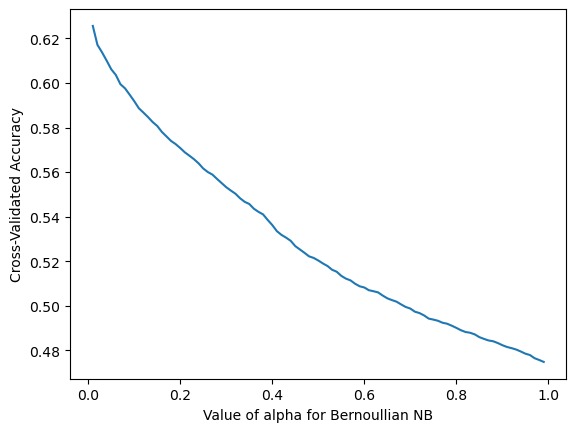

In [54]:
bern_scores = []
for a in alpha:
    BernoulliNB_model = BernoulliNB(alpha=a)
    score = cross_val_score(BernoulliNB_model, X_train, y_train, cv=5)
    print(round(a,4),score.mean())
    bern_scores.append(score.mean())

plt.plot(alpha, bern_scores)
plt.xlabel('Value of alpha for Bernoullian NB')
plt.ylabel('Cross-Validated Accuracy')
plt.show()    

Best for Bernoullian

In [9]:
f1s = []
precisions = []
recalls = []
metric = "weighted avg"

for a in alpha:
    BernoulliNB_model = BernoulliNB(alpha=a)
    BernoulliNB_model.fit(X_train, y_train)
    y_pred = BernoulliNB_model.predict(X_test)
    res = classification_report(y_test, y_pred, target_names=classes,output_dict=True,zero_division=0)
    f1s.append(res[metric]["f1-score"])
    precisions.append(res[metric]["precision"])
    recalls.append(res[metric]["recall"]) 


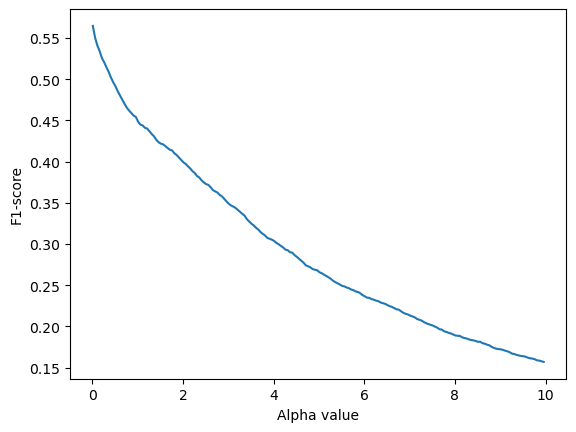

In [10]:
plt.plot(alpha, f1s)
plt.xlabel('Alpha value')
plt.ylabel('F1-score')
plt.show()

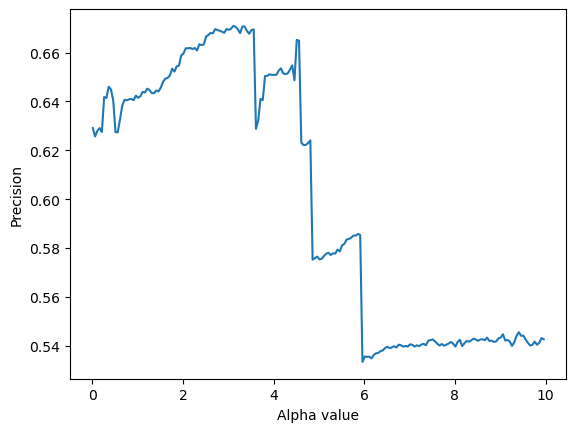

In [11]:
plt.plot(alpha, precisions)
plt.xlabel('Alpha value')
plt.ylabel('Precision')
plt.show()

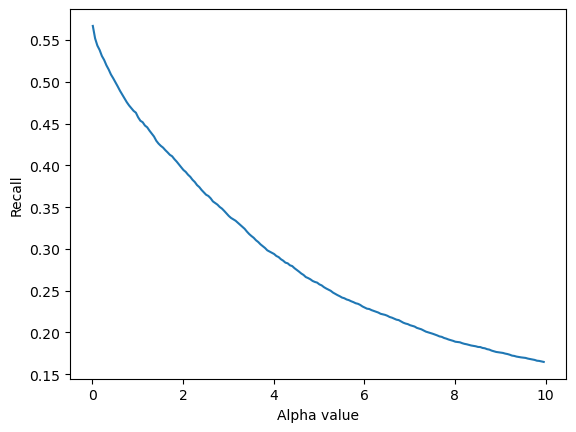

In [12]:
plt.plot(alpha, recalls)
plt.xlabel('Alpha value')
plt.ylabel('Recall')
plt.show()

We can see how the greater is alpha, the less are f1-score and recall. In fact, the grater is aplha the more "weight" we give to less frequent words. Therefore we are having a "greedier" approch, in which at a acertain point, the words which are really present in the document doesn't matter any more.

Precision? ()Simulate with zero_division=1 to see the curve always increase

Best for multinomial

In [13]:
f1s = []
precisions = []
recalls = []
metric = "weighted avg"

for a in alpha:
    MultinomialNB_model = MultinomialNB(alpha=a)
    MultinomialNB_model.fit(X_train, y_train)
    y_pred = MultinomialNB_model.predict(X_test)
    res = classification_report(y_test, y_pred, target_names=classes,output_dict=True,zero_division=0)
    f1s.append(res[metric]["f1-score"])
    precisions.append(res[metric]["precision"])
    recalls.append(res[metric]["recall"]) 

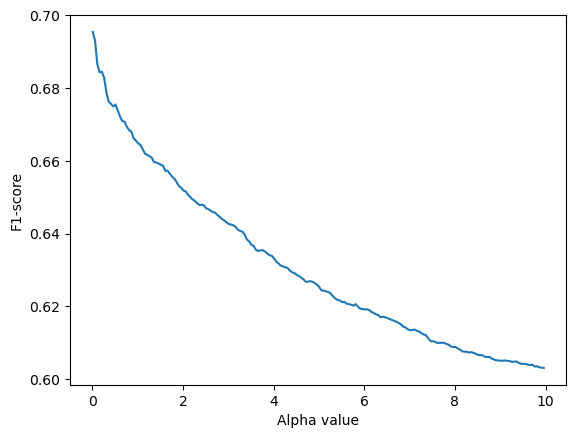

In [14]:
plt.plot(alpha, f1s)
plt.xlabel('Alpha value')
plt.ylabel('F1-score')
plt.show()

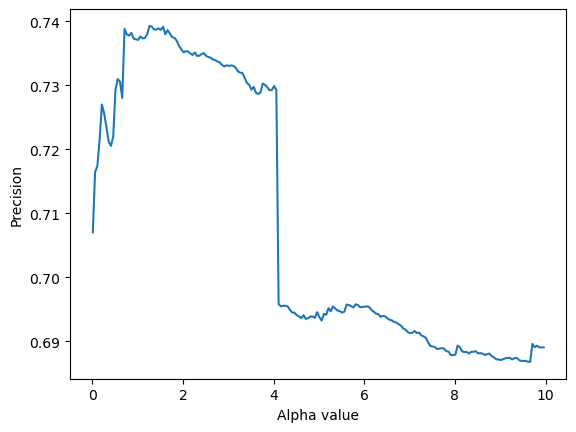

In [15]:
plt.plot(alpha, precisions)
plt.xlabel('Alpha value')
plt.ylabel('Precision')
plt.show()

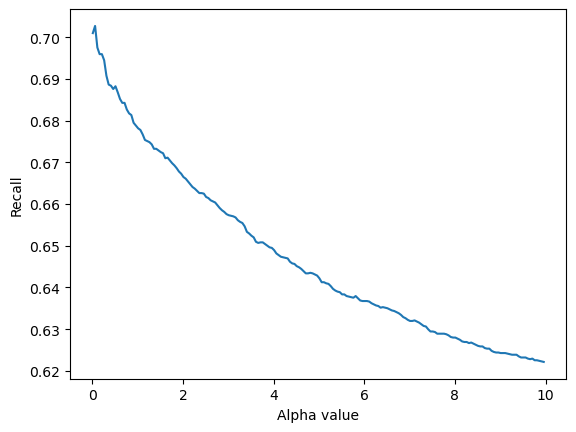

In [16]:
plt.plot(alpha, recalls)
plt.xlabel('Alpha value')
plt.ylabel('Recall')
plt.show()

We observe that we have more or less the same trend, but that the multinomial model is better in each metric as we should have aspected.
Infact multinomial model consider the number of occurances of the word, not only the presence or less of a word in a document. Therefore, we have more information about the dataset in the multinomial model and we can accept a better performance.

### Comparison

Continue....